# <u> Project 2 - Income Qualification</u>

## <u> DESCRIPTION</u>

## Identify the level of income qualification needed for the families in Latin America

## <u> Problem Statement Scenario:</u>

### Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

### In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

### The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.


### <u>Following actions should be performed:</u> 

    *Identify the output variable.
    * Understand the type of data.
    * Check if there are any biases in your dataset.
    * Check whether all members of the house have the same poverty level.
    * Check if there is a house without a family head.
    * Set the poverty level of the members and the head of the house same in a family.
    * Count how many null values are existing in columns.
    * Remove null value rows of the target variable.
    * Predict the accuracy using random forest classifier.
    * Check the accuracy using a random forest with cross-validation.

## Important Data Fields

#### 1. Id- a unique identifier for each row
#### 2. Target is an ordinal variable indicating groups of income levels:
### 1=Extreme Poverty; 2=Moderate poverty; 3=Vulnerable Households; 4=Non-vulnerable Households
#### 3.idhogar- this is a unique identifier for each household.This can be used to create household-widefeatures,etc.All rows given in a given household will have a matching value for this identifier .
#### 4. parentesco1-indicates if this person is the head of the household

#### Only heads of the household are used in scoring.All household members are included in train + test data sets,but only heads of the households are scored


In [1]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading data
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [3]:
test_df.info() # general summary information of train dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [4]:
train_df.info() #general summary infromation of test dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
train_df.head() # Exporing first five rows of train dataframe

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [6]:
test_df.head() # Exploring first five rows of test dataframe

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [7]:
train_df.shape # Number of rows and columns in train dataframe

(9557, 143)

In [8]:
test_df.shape # Number of rows and columns in test dataframe

(23856, 142)

In [1]:
## There is no 'Target Feature' in test data-set

##  <u>UNDERSTAND THE TYPE OF DATA</u>

In [9]:
## EXTRACTING COLUMNS FOR DIFFERENT DATA TYPES

#List the columns for different datatypes:
# Columns Integer Data types
print('Integer Type: ')
print(train_df.select_dtypes(np.int64).columns)
print('\n')

# Columns float Datatypes
print('Float Type:')
print(train_df.select_dtypes(np.float64).columns)
print("\t")

# Columns object Datatypes

print('Object Type:')
print(train_df.select_dtypes(np.object).columns)
print("\t")



Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type:
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')
	
Object Type:
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')
	


In [10]:
train_df.select_dtypes('int64').head() # Exploring first five records of integer datatype in train dataframe

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [11]:
# Extract columns with Null values (for integer datatype in train dataframe)

null_counts_int=train_df.select_dtypes('int64').isnull().sum()
null_counts_int
null_counts_int[null_counts_int>0]

Series([], dtype: int64)

In [ ]:
## There is no null values for integer datatype in train dataset

In [12]:
train_df.select_dtypes('float64').head()


,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [13]:
# Extract columns with Null values (for (float datatype in train dataframe)
null_counts_float=train_df.select_dtypes("float64").isnull().sum()
null_counts_float[null_counts_float>0]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [14]:
train_df.select_dtypes("object").head() # Exploring first five records of object type data containing columns in train dataframe.

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [15]:
# Here columns "dependency",'edjefe"(years of education of male head of household,based on the years of education,head of household and gender, yes=1 and no=0) and "edjefa"( years of education of female head of household, based on the interaction of
# escolari (years of education), head of household and gender, yes=1 and no=0)contains mixed values i.e,both integer data-type and string data-type

In [16]:
# Extracting the columns with null value(for object datatype)

null_counts_ob=train_df.select_dtypes("object").isnull().sum()
null_counts_ob[null_counts_ob>0]

Series([], dtype: int64)

In [2]:
# There is no null values in train dataset for object datatype

## <u> DATA CLEANING</u>

### Converting "yes"=1 and "no"=0 as float data-type (coloumn names= 'dependency','edjefe' and 'edjefa')


In [17]:
mapping={'yes':1,'no':2}

for df in [train_df,test_df]:
    df['dependency']=df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe']=df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa']=df['edjefa'].replace(mapping).astype(np.float64)
    
train_df[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.515146,5.884064,4.200586
std,1.528456,4.522692,3.824210
min,0.166667,1.000000,1.000000
25%,0.500000,2.000000,2.000000
50%,1.000000,6.000000,2.000000
75%,2.000000,9.000000,6.000000
max,8.000000,21.000000,21.000000


## <u>FIXING THE COLUMNS WITH NULL VALUES</u>
#### According to the documentation for these columns:

#### v2a1              :Monthly rent payment                                                                                                :(Total null values: 6860)
#### v18q1            :number of tablets household owns                                                                          :(Total null values: 7342) 
#### rez_esc         :Years behind in school                                                                                               :(Total null values: 7928)
#### meaneduc     :average years of education for adults (18+)                                                            :(Total null values: 5)
#### SQBmeaned  :square of the mean years of education of adults (>=18) in the household 142   :(Total null values: 5)

In [18]:
data = train_df[train_df['v2a1'].isnull()].head()

columns=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
data[columns]

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
2,1,0,0,0,0
13,1,0,0,0,0
14,1,0,0,0,0
26,1,0,0,0,0
32,1,0,0,0,0


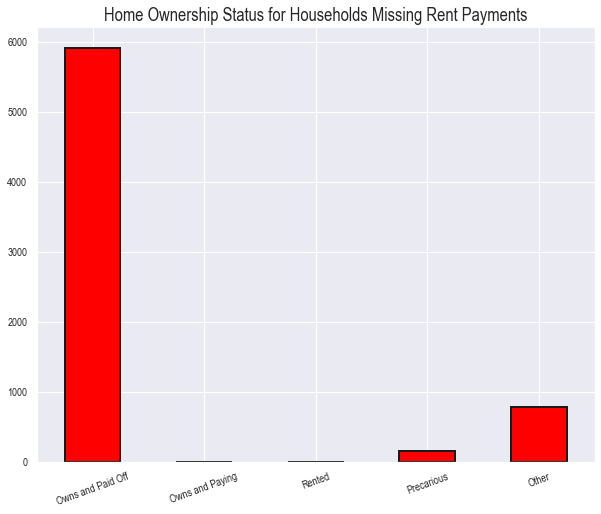

In [19]:
# home-ownership indicating Variables  
own_variables = [x for x in train_df if x.startswith('tipo')]

# Plotting  home-ownership variables for homes  missing rent-payments
train_df.loc[train_df['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'red',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [20]:
#Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.
#Lets add 0 for all the null values.

for df in [train_df, test_df]:
    df['v2a1'].fillna(value=0, inplace=True)

train_df[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

In [21]:
# 2. Now comes v18q1 (total nulls: 7342) : number of tablets household owns 
# why the null values, Lets look at few rows with nulls in v18q1
# Columns related to  number of tablets household owns 
# v18q, owns a tablet





In [22]:
# Since this is a household variable, it only makes sense to look at it on a household level, 
# so we'll only select the rows for the head of household.

# Heads of household
heads = train_df.loc[train_df['parentesco1'] == 1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

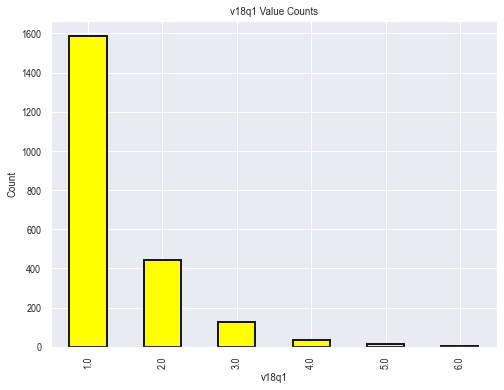

In [23]:
plt.figure(figsize = (8, 6))
col='v18q1'
train_df[col].value_counts().sort_index().plot.bar(color = 'Yellow',
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
plt.show();

In [24]:
#Looking at the above data it makes sense that when owns a tablet column is 0, there will be no number of tablets household owns.
#Lets add 0 for all the null values.
for df in [train_df, test_df]:
    df['v18q1'].fillna(value=0, inplace=True)

train_df[['v18q1']].isnull().sum()

v18q1    0
dtype: int64

In [25]:
# 3. look at rez_esc    (total nulls: 7928) : Years behind in school  
# why the null values, Lets look at few rows with nulls in rez_esc
# Columns related to Years behind in school 
# Age in years

# Lets look at the data with not null values first.
train_df[train_df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [26]:
# 3. look at rez_esc    (total nulls: 7928) : Years behind in school  
# why the null values, Lets look at few rows with nulls in rez_esc
# Columns related to Years behind in school 
# Age in years

# Lets look at the data with not null values first
train_df[train_df['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [27]:
train_df.loc[(train_df['rez_esc'].isnull() & ((train_df['age'] > 7) & (train_df['age'] < 17)))]['age'].describe()
#There is one value that has Null for the 'behind in school' column with age between 7 and 17 

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [28]:
train_df[(train_df['age'] ==10) & train_df['rez_esc'].isnull()].head()
train_df[(train_df['Id'] =='ID_f012e4242')].head()
#there is only one member in household for the member with age 10 and who is 'behind in school'. This explains why the member is 
#behind in school.

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [29]:
#from above we see that  the 'behind in school' column has null values 
# Lets use the above to fix the data
for df in [train_df, test_df]:
    df['rez_esc'].fillna(value=0, inplace=True)
train_df[['rez_esc']].isnull().sum()

rez_esc    0
dtype: int64

In [30]:
#Lets look at meaneduc   (total nulls: 5) : average years of education for adults (18+)  
# why the null values, Lets look at few rows with nulls in meaneduc
# Columns related to average years of education for adults (18+)  
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
#    head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education), 
#    head of household and gender, yes=1 and no=0 
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary 

In [31]:
data = train_df[train_df['meaneduc'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [32]:
#from the above, we find that meaneduc is null when no level of education is 0
#Lets fix the data
for df in [train_df, test_df]:
    df['meaneduc'].fillna(value=0, inplace=True)
train_df[['meaneduc']].isnull().sum()

meaneduc    0
dtype: int64

In [33]:
#Lets look at SQBmeaned  (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142  
# why the null values, Lets look at few rows with nulls in SQBmeaned
# Columns related to average years of education for adults (18+)  
# edjefe, years of education of male head of household, based on the interaction of escolari (years of education),
#    head of household and gender, yes=1 and no=0
# edjefa, years of education of female head of household, based on the interaction of escolari (years of education), 
#    head of household and gender, yes=1 and no=0 
# instlevel1, =1 no level of education
# instlevel2, =1 incomplete primary 

In [34]:
data = train_df[train_df['SQBmeaned'].isnull()].head()

columns=['edjefe','edjefa','instlevel1','instlevel2']
data[columns][data[columns]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [35]:
#from the above, we find that SQBmeaned is null when no level of education is 0
#Lets fix the data
for df in [train_df,test_df]:
    df['SQBmeaned'].fillna(value=0, inplace=True)
train_df[['SQBmeaned']].isnull().sum()

SQBmeaned    0
dtype: int64

In [36]:
#Lets look at the overall data
null_counts_overall = train_df.isnull().sum()
null_counts_overall[null_counts_overall > 0].sort_values(ascending=False)

Series([], dtype: int64)

## <u>LOOKING AT THE TARGET COLUMN</u>

In [37]:

# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [38]:
#Lets check one household
train_df[train_df['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


## <u>CHECK IF ALL FAMILIES HAVE A HEAD</u>

In [39]:
#After that we will useTarget value of the parent record (head of the household) and update rest.  

households_head = train_df.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train_df.loc[train_df['idhogar'].isin(households_head[households_head == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [40]:
# Find households without a head and where Target value are different

households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


## <u>SET THE POVERTY LEVEL OF MEMBERS AND THE HEAD OF THE HOUSE SAME IN FAMILY</u>

In [41]:
#Lets fix the data
#Set poverty level of the members and the head of the house within a family.
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train_df[(train_df['idhogar'] == household) & (train_df['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train_df.loc[train_df['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


## <u>CHECK IF THERE ARE ANY BIASES IN YOUR DATASET</u>

In [42]:
#Lets look at the dataset and plot head of household and Target
# 1 = extreme poverty 2 = moderate poverty 3 = vulnerable households 4 = non vulnerable households 
target_counts = heads['Target'].value_counts().sort_index()
target_counts

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

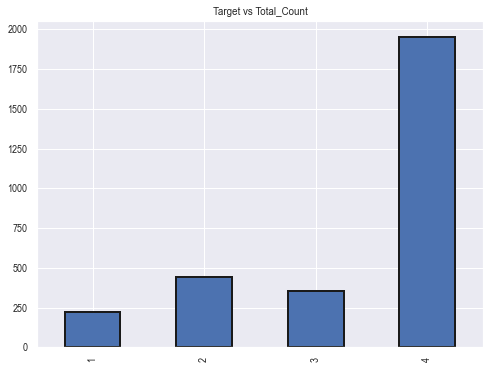

In [43]:
target_counts.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k',title="Target vs Total_Count")

In [44]:
# Extreme poverty is the smallest count in the train dataset. The dataset is biased

3.4 Lets look at the Squared Variables

‘SQBescolari’

‘SQBage’

‘SQBhogar_total’

‘SQBedjefe’

‘SQBhogar_nin’

‘SQBovercrowding’

‘SQBdependency’

‘SQBmeaned’

‘agesq’

In [45]:
#Lets remove them
print(train_df.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

for df in [train_df, test_df]:
    df.drop(columns = cols,inplace=True)

print(train_df.shape)

(9557, 143)
(9557, 134)


In [46]:
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [47]:
#Check for redundant household variables
heads = train_df.loc[train_df['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [48]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [49]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


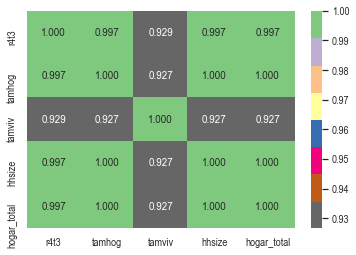

In [50]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

In [51]:
# There are several variables here having to do with the size of the house:
# r4t3, Total persons in the household
# tamhog, size of the household
# tamviv, number of persons living in the household
# hhsize, household size
# hogar_total, # of total individuals in the household
# These variables are all highly correlated with one another.

In [52]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [train_df,test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 131)

In [53]:
#Check for redundant Individual variables
ind = train_df[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [54]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [55]:
# This is simply the opposite of male! We can remove the male flag.
for df in [train_df, test_df]:
    df.drop(columns = 'male',inplace=True)

train_df.shape

(9557, 130)

In [56]:
#lets check area1 and area2 also
# area1, =1 zona urbana 
# area2, =2 zona rural 
#area2 redundant because we have a column indicating if the house is in a urban zone

for df in [train_df, test_df]:
    df.drop(columns = 'area2',inplace=True)

train_df.shape

(9557, 129)

In [57]:
#Finally lets delete 'Id', 'idhogar'
cols=['Id','idhogar']
for df in [train_df,test_df]:
    df.drop(columns = cols,inplace=True)

train_df.shape

(9557, 127)

## <u> PREDICT THE ACCURACY USING THE RANDOM FOREST CLASSIFIER</u>

In [58]:
x_features=train_df.iloc[:,0:-1]
y_features=train_df.iloc[:,-1]
print(x_features.shape)
print(y_features.shape)

(9557, 126)
(9557,)


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=1)

rmclassifier = RandomForestClassifier()

In [60]:
rmclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
y_predict = rmclassifier.predict(x_test)

In [62]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9424686192468619
[[ 132    0    0   25]
 [   0  280    1   36]
 [   0    2  186   45]
 [   0    0    1 1204]]
              precision    recall  f1-score   support

           1       1.00      0.84      0.91       157
           2       0.99      0.88      0.93       317
           3       0.99      0.80      0.88       233
           4       0.92      1.00      0.96      1205

    accuracy                           0.94      1912
   macro avg       0.98      0.88      0.92      1912
weighted avg       0.95      0.94      0.94      1912



In [63]:
y_predict_testdata = rmclassifier.predict(test_df)

In [64]:
y_predict_testdata

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

## <u>CHECK THE ACCURACY USING RANDOM FOREST WITH CROSS VALIDATION</u>

In [65]:
from sklearn.model_selection import KFold,cross_val_score

#### checking the score using default 10 trees

In [66]:
seed=7
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rmclassifier=RandomForestClassifier(random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)


[0.94037657 0.94508368 0.94348509 0.93406593 0.94453166]
94.15085860543122


#### checking the score using default 100 trees

In [67]:
num_trees= 100

rmclassifier=RandomForestClassifier(n_estimators=100, random_state=10,n_jobs = -1)
print(cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy'))
results=cross_val_score(rmclassifier,x_features,y_features,cv=kfold,scoring='accuracy')
print(results.mean()*100)

[0.94037657 0.94508368 0.94348509 0.93406593 0.94453166]
94.15085860543122


In [69]:
rmclassifier.fit(x_features,y_features)
labels = list(x_features)
feature_importances = pd.DataFrame({'feature': labels, 'importance': rmclassifier.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()

,feature,importance
0,v2a1,0.019337
2,rooms,0.024454
9,r4h2,0.019699
10,r4h3,0.020549
11,r4m1,0.015619


Text(0.5, 0, 'Importance')

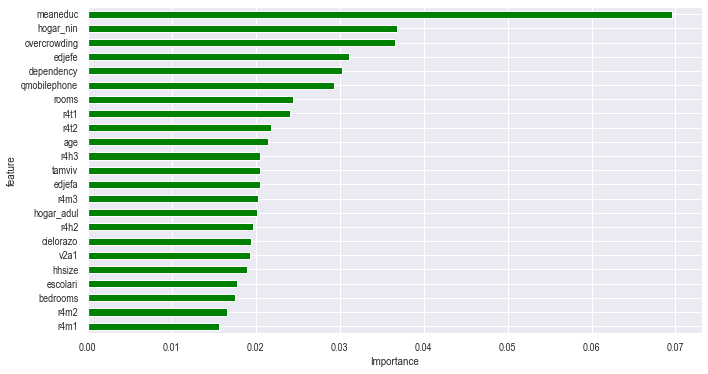

In [70]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('feature',inplace=True)
feature_importances.head()

feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'green', False: 'red'}))
plt.xlabel('Importance')